<a href="https://colab.research.google.com/github/Krukalex/Stock-Prices-LSTM/blob/main/stock_price_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#get the stock quote
df=web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')

df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.540048
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.607438
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.747405
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.880663
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.860230
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.426811
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,66.596100
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.501350


In [ ]:
#get number of rows and columns in dataset
df.shape

(2003, 6)

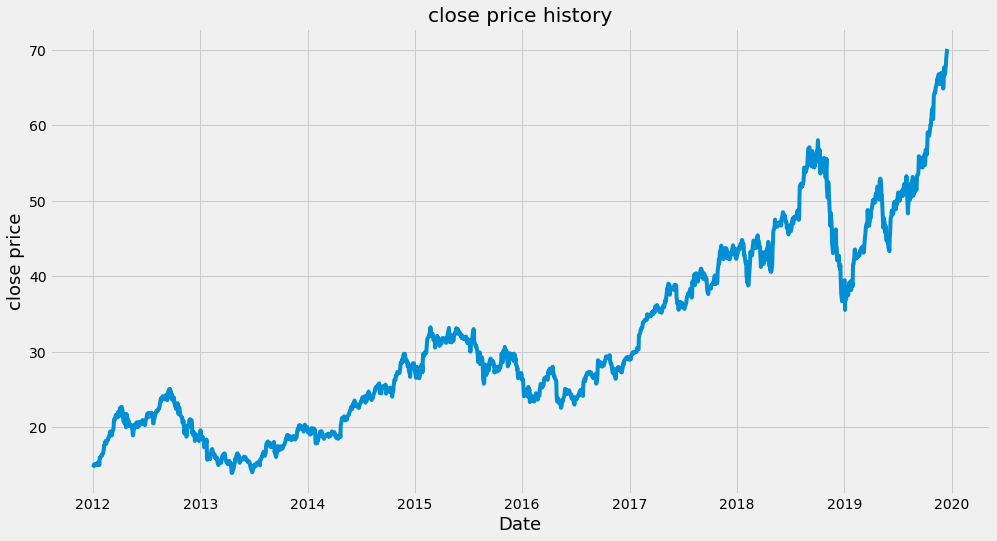

In [ ]:
#visualize closing price of data

plt.figure(figsize=(15,8))
plt.title('close price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price', fontsize=18)
plt.show()

In [ ]:
#create new dataframe with only close column
data=df.filter(['Close'])
#convert dataframe to numpy array
dataset=data.values

#get number of rows to train lstm
training_data_len=math.ceil(len(dataset)*0.8)

training_data_len


1603

In [ ]:
#scale data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

In [ ]:
scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [ ]:
#create training dataset
#create scaled training dataset
train_data=scaled_data[:training_data_len,:]
#split data into x train and y train
x_train=[]
y_train=[]

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i, 0])
  if i <=61:
    print(x_train)
    print(y_train)

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]
[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.018

In [ ]:
#convert x_train and y_train to numpy arrays

x_train, y_train=np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(1543, 60)

In [ ]:
#reshape data

x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1543, 60, 1)

In [ ]:
#build lstm model
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1543/1543 [==============================] - 49s 30ms/step - loss: 5.3504e-04


In [ ]:
#create testing dataset
#create a new array containing scaled values from index 1543 to 2003

test_data=scaled_data[training_data_len-60:,:]
#create datasets x_test and y_test
x_test=[]
#all of the final 460 values
#note that these are derived from original dataset, so they are not scaled as the x values are
#this is why we need to unscale the predictions
y_test=dataset[training_data_len:,:]

for i in range(60,len(test_data)):
  #append past 60 values preceding a given point in testing  set
  x_test.append(test_data[i-60:i,0])

In [ ]:
#convert data to numpy array
x_test=np.array(x_test)

In [ ]:
#reshape the data
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#get models predicted price values 
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [ ]:
#get the root mean squared error(RMSE)
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.845164442062378

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


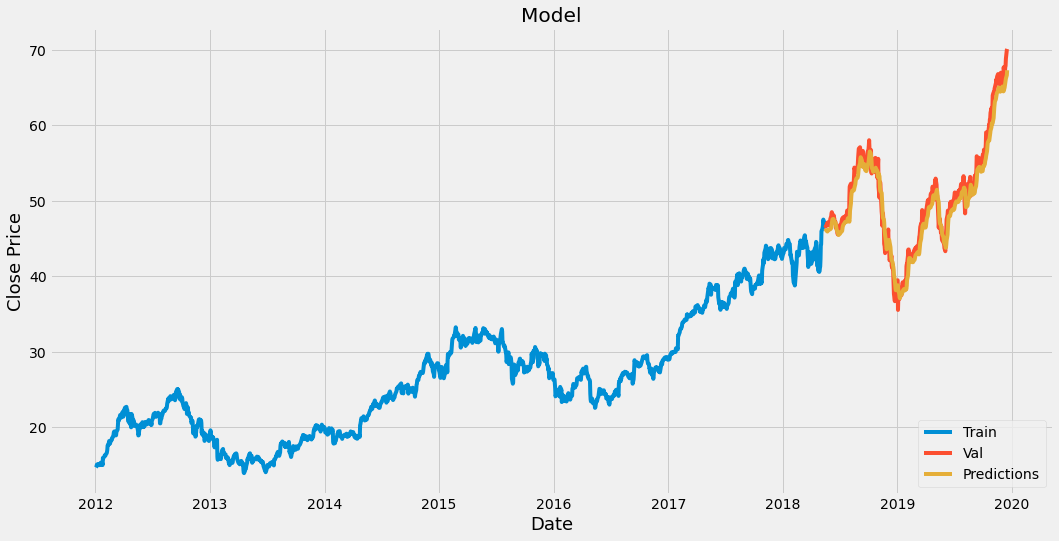

In [ ]:
#plot data


#closing price of training data
train=data[:training_data_len]
#closing price of validation data
valid=data[training_data_len:]
#predicted closing price of validation data
valid['predictions']=predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#show the valid and predicted prices
valid

,Close,predictions
Date,,
2018-05-17,46.747501,46.310658
2018-05-18,46.577499,46.171993
2018-05-21,46.907501,46.012470
2018-05-22,46.790001,45.955154
2018-05-23,47.090000,45.931309
...,...,...
2019-12-11,67.692497,65.560341
2019-12-12,67.864998,65.882408
2019-12-13,68.787498,66.186256


In [ ]:
#predict closing price for december 18 2019
#get qoute
apple_quote=web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
new_df=apple_quote.filter(['Close'])
#get last 60 day closing price values and conver the dataframe to an array
last_60=new_df[-60:].values
#scale the data to values between 0 and 1
last_60_scaled=scaler.transform(last_60)
#create empty lsit
X_test=[]
#append past 60 days to X_test
X_test.append(last_60_scaled)
#convert X_test data set to a numpy array
X_test=np.array(X_test)
#reshape data
X_test=np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#get predicted scaled price
pred_price=model.predict(X_test)
#undo Scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[67.89781]]


In [ ]:
#see actual price
apple_quote2=web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(apple_quote2['Close'])

Date
2019-12-18    69.934998
Name: Close, dtype: float64
